In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Text(0.5, 1.0, 'SalePrice distribution')

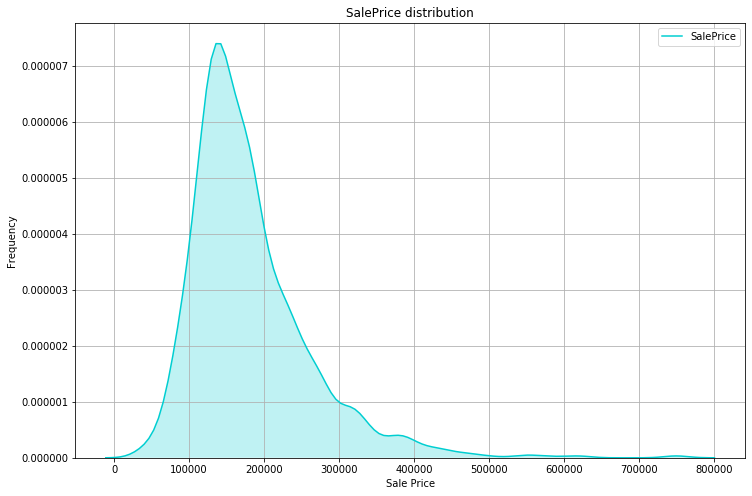

In [8]:
plt.figure(figsize = (12, 8))
sns.kdeplot(train['SalePrice'], color = 'darkturquoise', shade= True)
plt.grid()
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Text(0.5, 1, 'Correlation matrix')

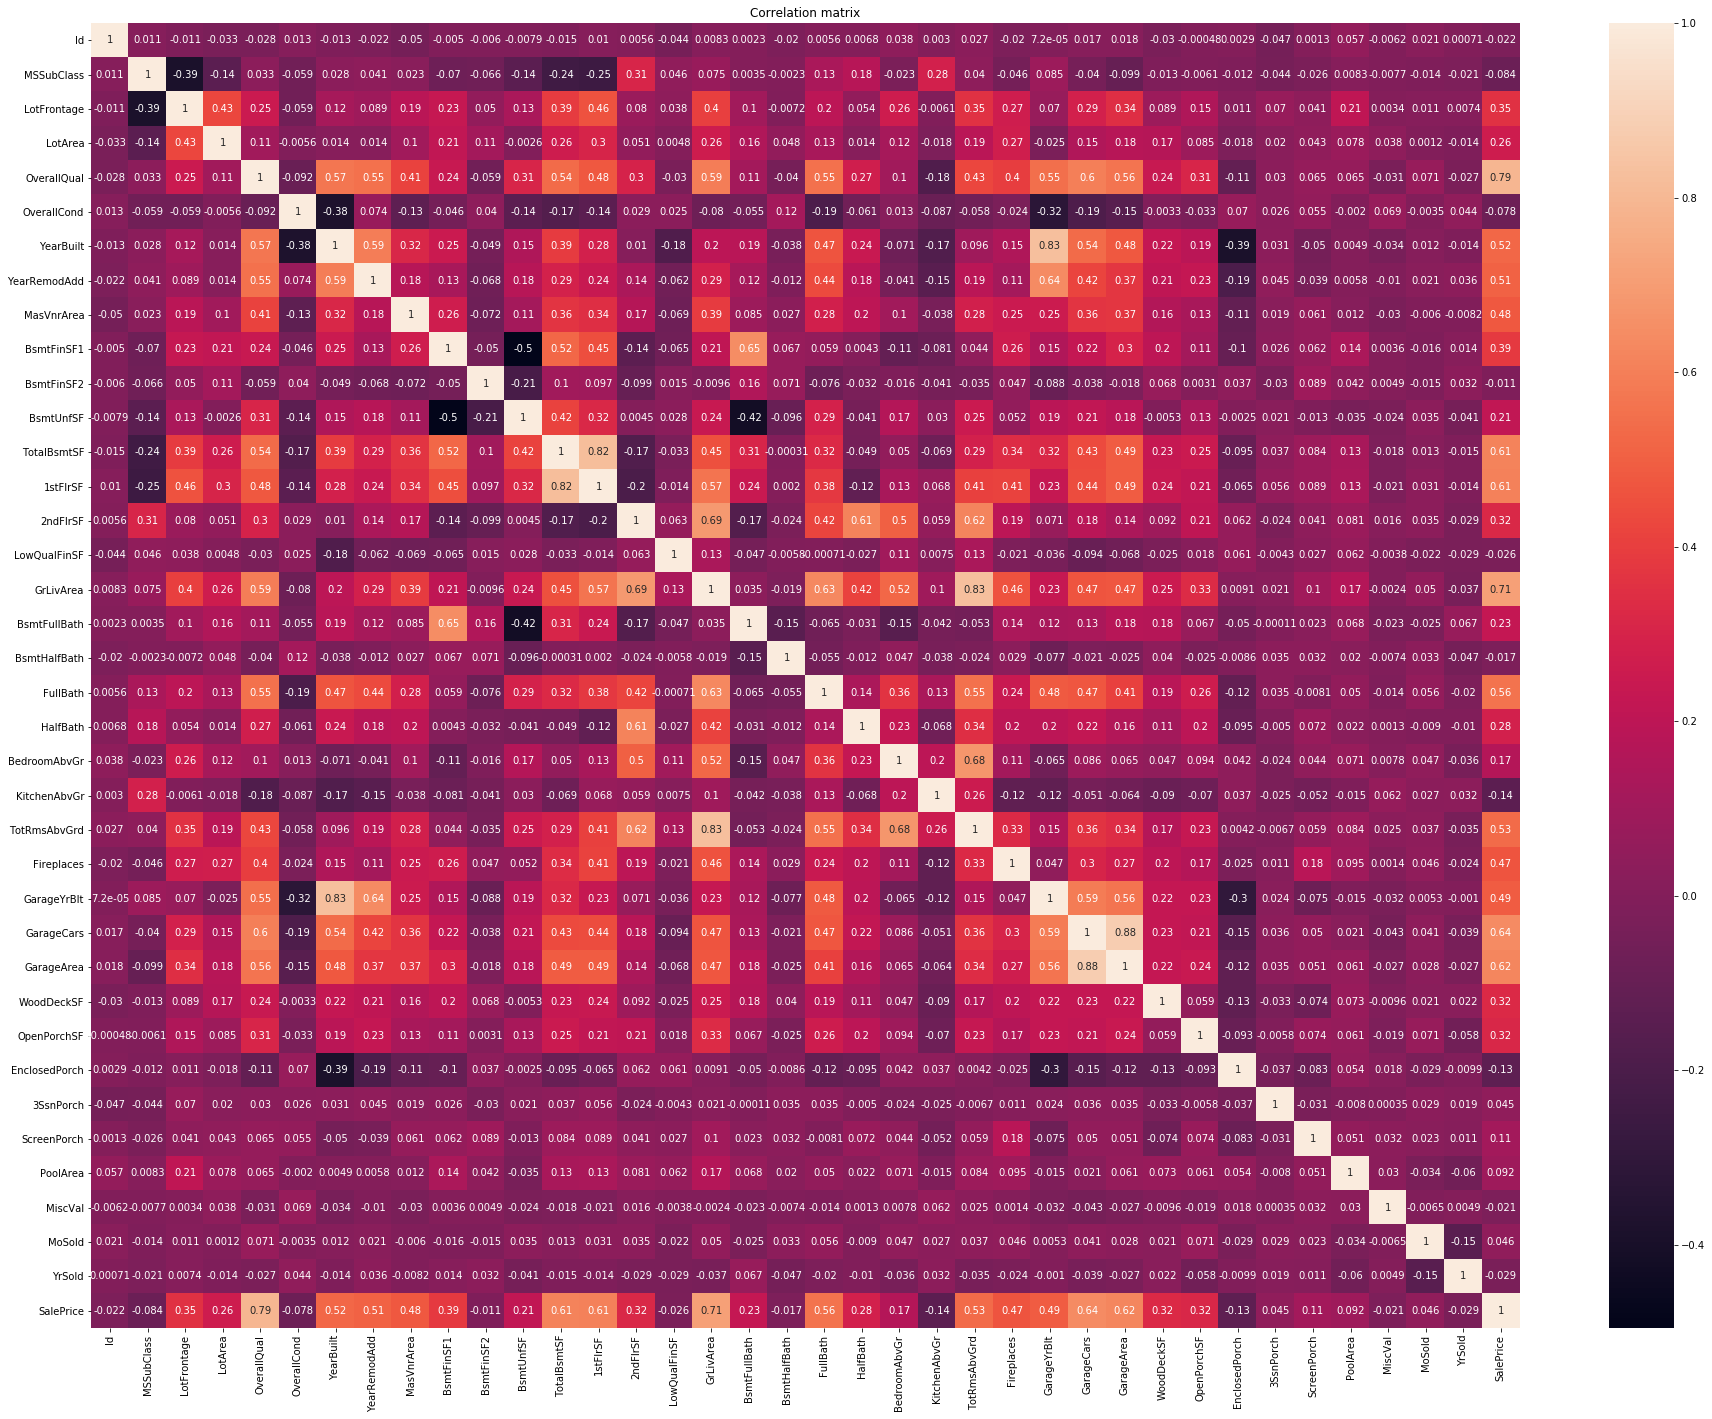

In [10]:
plt.figure(figsize = (32, 24))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation matrix')

In [11]:
corr_for_sale_price = train.corr()
corr_for_sale_price['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1.0, 'The boxplot for OverallQual')

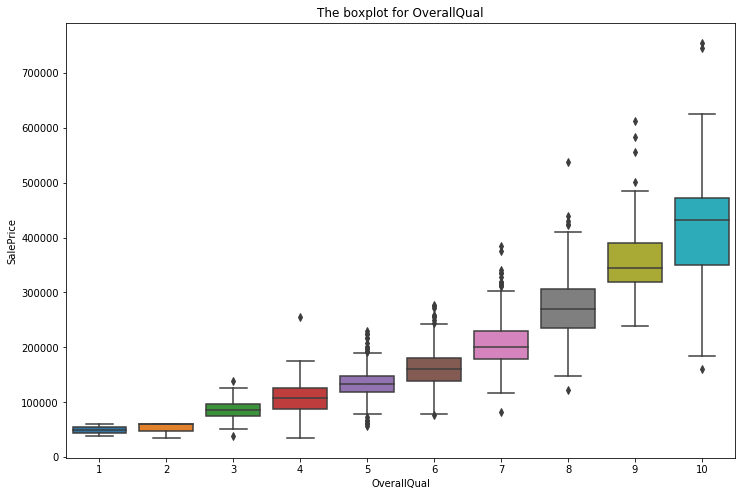

In [12]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = train['OverallQual'], y = train['SalePrice'])
plt.title('The boxplot for OverallQual')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

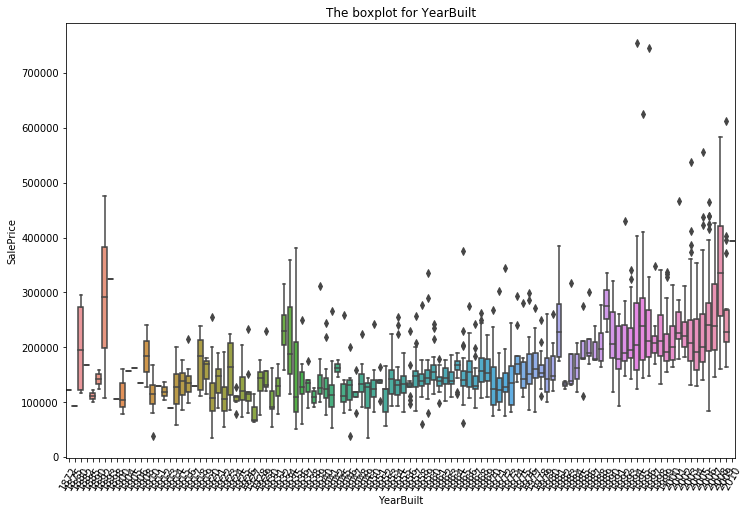

In [13]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = train['YearBuilt'], y = train['SalePrice'])
plt.title('The boxplot for YearBuilt')
plt.xticks(rotation=60)

Text(0.5, 1.0, 'Scatter plot for GrLivArea')

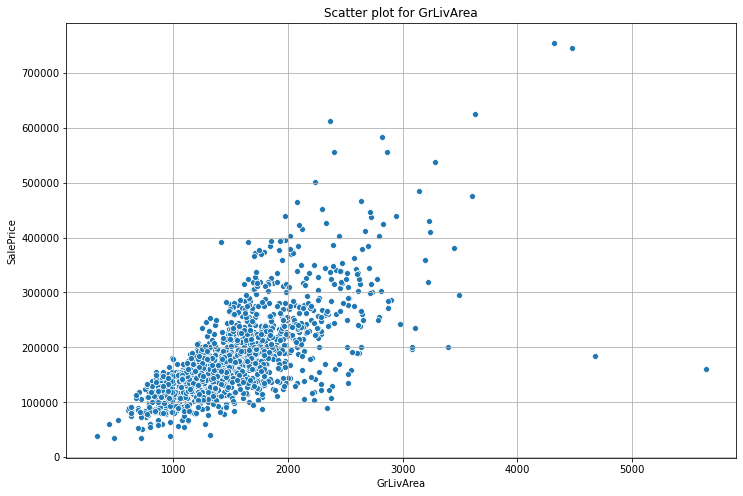

In [11]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'])
plt.grid()
plt.title('Scatter plot for GrLivArea')

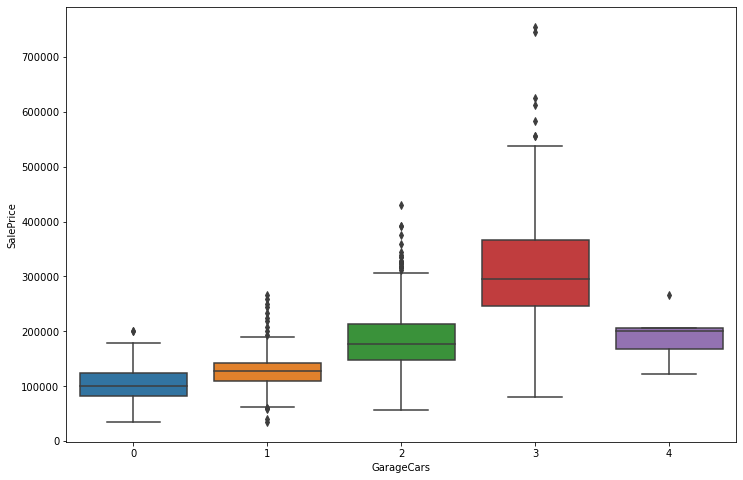

In [12]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = train['GarageCars'], y = train['SalePrice'])

Data imputation and feature engeneering

In [14]:
def prepare_data(df):
    if df.dtype=='object':
        df = df.fillna('N')
    if df.dtype=='float32' or df.dtype=='float64':
        df = df.fillna(0)
    return df

train = train.apply(lambda x: prepare_data(x))
test = test.apply(lambda x: prepare_data(x))

In [15]:
def garage_area_category(area):
    if area <= 250:
        return 1
    elif 250 < area <= 500:
        return 2
    elif 500 < area <= 1000:
        return 3
    return 4
train['GarageArea_category'] = train['GarageArea'].apply(garage_area_category)
test['GarageArea_category'] = test['GarageArea'].apply(garage_area_category)

In [16]:
def grlivarea_category(area):
    if area <= 1000:
        return 1
    elif 1000 < area <= 2000:
        return 2
    elif 2000 < area <= 3000:
        return 3
    return 4
train['GrLivArea_category'] = train['GrLivArea'].apply(grlivarea_category)
test['GrLivArea_category'] = test['GrLivArea'].apply(grlivarea_category)

In [17]:
def flrSF_and_bsmt_category(square):
    if square <= 500:
        return 1
    elif 500 < square <= 1000:
        return 2
    elif 1000 < square <= 1500:
        return 3
    elif 1500 < square <= 2000:
        return 4
    return 5

train['1stFlrSF_category'] = train['1stFlrSF'].apply(flrSF_and_bsmt_category)
train['2ndFlrSF_category'] = train['2ndFlrSF'].apply(flrSF_and_bsmt_category)

test['1stFlrSF_category'] = test['1stFlrSF'].apply(flrSF_and_bsmt_category)
test['2ndFlrSF_category'] = test['2ndFlrSF'].apply(flrSF_and_bsmt_category)

train['BsmtUnfSF_category'] = train['BsmtUnfSF'].apply(flrSF_and_bsmt_category)
test['BsmtUnfSF_category'] = test['BsmtUnfSF'].apply(flrSF_and_bsmt_category)

In [18]:
def lot_frontage_category(frontage):
    if frontage <= 50:
        return 1
    elif 50 < frontage <= 100:
        return 2
    elif 100 < frontage <= 150:
        return 3
    return 4
train['LotFrontage_category'] = train['LotFrontage'].apply(lot_frontage_category)
test['LotFrontage_category'] = test['LotFrontage'].apply(lot_frontage_category)

In [19]:
def lot_area_category(area):
    if area <= 5000:
        return 1
    elif 5000 < area <= 10000:
        return 2
    elif 10000 < area <= 15000:
        return 3
    elif 15000 < area <= 20000:
        return 4
    elif 20000 < area <= 25000:
        return 5
    return 6
train['LotArea_category'] = train['LotArea'].apply(lot_area_category)
test['LotArea_category'] = test['LotArea'].apply(lot_area_category)

In [20]:
def year_category(year):
    if year <= 1910:
        return 1
    elif 1910 < year <= 1950:
        return 2
    elif 1950 < year <= 1980:
        return 3
    elif 1980 < year <= 2000:
        return 4
    return 5

train['YearBuilt_category'] = train['YearBuilt'].apply(year_category)
test['YearBuilt_category'] = test['YearBuilt'].apply(year_category)

train['YearRemodAdd_category'] = train['YearRemodAdd'].apply(year_category)
test['YearRemodAdd_category'] = test['YearRemodAdd'].apply(year_category)

train['GarageYrBlt_category'] = train['GarageYrBlt'].apply(year_category)
test['GarageYrBlt_category'] = test['GarageYrBlt'].apply(year_category)

In [21]:
def vnr_area_category(area):
    if area <= 250:
        return 1
    elif 250 < area <= 500:
        return 2
    elif 500 < area <= 750:
        return 3
    return 4

train['MasVnrArea_category'] = train['MasVnrArea'].apply(vnr_area_category)
test['MasVnrArea_category'] = test['MasVnrArea'].apply(vnr_area_category)

In [22]:
train['AllSF'] = train['GrLivArea'] + train['TotalBsmtSF']
test['AllSF'] = test['GrLivArea'] + test['TotalBsmtSF']

def allsf_category(area):
    if area < 1000:
        return 1
    elif 1000 < area <= 2000:
        return 2
    elif 2000 < area <= 3000:
        return 3
    elif 3000 < area <= 4000:
        return 4
    elif 4000 < area <= 5000:
        return 5
    elif 5000 < area <= 6000:
        return 6
    return 7

train['AllSF_category'] = train['AllSF'].apply(allsf_category)
test['AllSF_category'] = test['AllSF'].apply(allsf_category)

In [23]:
train = train.drop(['AllSF', 'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'LotArea',
                   'LotFrontage', '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'Neighborhood', 'BldgType', 'Exterior1st', 'Exterior2nd', 
                   'MiscFeature', 'MiscVal'], axis = 1)
test = test.drop(['AllSF', 'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt', 'LotArea',
                   'LotFrontage', '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'Neighborhood', 'BldgType', 'Exterior1st', 'Exterior2nd',
                 'MiscFeature', 'MiscVal'], axis = 1)

In [24]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df
train = train.apply(lambda x: object_to_int(x))
test = test.apply(lambda x: object_to_int(x))

In [25]:
dummy_col = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
          'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
          'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 
            'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 
            'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
            'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'GarageArea_category', 
             'GrLivArea_category', '1stFlrSF_category', '2ndFlrSF_category', 'BsmtUnfSF_category', 'LotFrontage_category',
            'LotArea_category', 'YearBuilt_category', 'YearRemodAdd_category', 
             'GarageYrBlt_category', 'MasVnrArea_category', 'AllSF_category']
#train = pd.get_dummies(train, columns = dummy_col, drop_first = True)

In [26]:
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 12345)

In [27]:
std_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 
           'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
          'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
          'PoolArea']
scaler = StandardScaler()
scaler.fit(X_train[std_col])
X_train[std_col] = scaler.transform(X_train[std_col])
X_valid[std_col] = scaler.transform(X_valid[std_col])
test[std_col] = scaler.transform(test[std_col])

In [55]:
X_train

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,1stFlrSF_category,2ndFlrSF_category,BsmtUnfSF_category,LotFrontage_category,LotArea_category,YearBuilt_category,YearRemodAdd_category,GarageYrBlt_category,MasVnrArea_category,AllSF_category
1169,1170,0.065182,3,1,1,0,3,0,1,0,...,4,4,2,3,6,4,4,4,4,6
391,392,0.065182,3,1,1,0,3,0,1,0,...,2,3,1,2,3,5,5,5,1,3
1413,1414,-0.869342,3,1,1,0,3,0,0,0,...,4,1,2,2,3,5,5,5,2,4
1302,1303,0.065182,3,1,1,3,3,0,4,0,...,3,3,1,2,3,4,4,4,2,4
647,648,-0.869342,3,1,1,0,3,0,4,0,...,3,1,2,2,3,3,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,2.868755,4,1,1,3,3,0,4,0,...,2,1,1,1,1,3,3,1,1,2
1444,1445,-0.869342,3,1,1,3,3,0,2,0,...,3,1,3,2,2,5,5,5,1,3
129,130,-0.869342,3,1,1,3,3,0,4,0,...,3,1,1,2,2,3,4,4,1,3
1309,1310,-0.869342,3,1,1,3,3,0,4,0,...,3,1,1,1,2,4,4,4,1,3


In [50]:
import tensorflow as tf
from tensorflow import keras

In [82]:
output_bias = y_valid.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [83]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
            optimizer=optimizer,
            metrics=['mse'])

In [84]:
%%time
MAX_EPOCHS=30
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=32, validation_data=(X_valid, y_valid),verbose=2,shuffle=False, )

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

35/35 - 0s - loss: 182127.5156 - mse: 39943749632.0000 - val_loss: 170708.7969 - val_mse: 33925904384.0000
Epoch 2/30
35/35 - 0s - loss: 180195.6094 - mse: 39232425984.0000 - val_loss: 168717.3438 - val_mse: 33241804800.0000
Epoch 3/30
35/35 - 0s - loss: 177945.7500 - mse: 38410805248.0000 - val_loss: 166275.6562 - val_mse: 32412332032.0000
Epoch 4/30
35/35 - 0s - loss: 175194.8281 - mse: 37418491904.0000 - val_loss: 163331.7969 - val_mse: 31427854336.0000
Epoch 5/30
35/35 - 0s - loss: 171921

In [85]:
lr = LinearRegression()
history=lr.fit(X_train, y_train)
predict_lr = lr.predict(X_valid)
mse_lr = cross_val_score(lr, X_valid, y_valid, scoring = 'neg_mean_squared_error', cv=10)
rmse_lr = np.sqrt(-mse_lr)
print(rmse_lr.mean())

43602.35524560026


In [86]:
mse_lr

array([-7.69994435e+08, -1.01239156e+09, -6.89074902e+08, -9.97316449e+08,
       -6.22639017e+09, -1.55997832e+10, -5.05088520e+08, -7.75486854e+08,
       -1.15647006e+09, -9.29695118e+08])

In [43]:
history.score(X_valid, y_valid)

0.7863106576396033

In [44]:
rf = RandomForestRegressor(random_state = 12345)
history=rf.fit(X_train, y_train)
predict_lrf = lr.predict(X_valid)
mse_rf = cross_val_score(rf, X_valid, y_valid, scoring = 'neg_mean_squared_error', cv=10)
rmse_rf = np.sqrt(-mse_rf)
print(rmse_rf.mean())

29338.180765644105


In [45]:
history.score(X_valid, y_valid)

0.7847268856469487

In [46]:
xgb = XGBRegressor(random_state = 12345)
history=xgb.fit(X_train, y_train)
predict_xgb= xgb.predict(X_valid)
mse_xgb = cross_val_score(xgb, X_valid, y_valid, scoring ='neg_mean_squared_error', cv=10)
rmse_xgb= np.sqrt(-mse_xgb)
print(rmse_xgb.mean())

30358.484627054342


In [47]:
history.score(X_valid, y_valid)

0.7412453208813499

In [89]:
rf_rs = RandomForestRegressor(random_state = 12345)
parameters_rf = {'n_estimators': range(1, 1800, 25), 
                 'max_depth':range(1, 100), 
                 'min_samples_split': range(1, 12), 
                 'min_samples_leaf': range(1, 12), 
                 'max_features':['auto', 'log2', 'sqrt']}
search_rf = RandomizedSearchCV(rf_rs, parameters_rf, cv=5, scoring = 'neg_mean_squared_error', n_jobs = -1, random_state = 12345)
history=search_rf.fit(X_train, y_train)
best_rf = search_rf.best_estimator_
predict_rf = best_rf.predict(X_valid)
mse_rf_rs = cross_val_score(best_rf, X_valid, y_valid, scoring = 'neg_mean_squared_error', cv=10)
rmse_rf_rs = np.sqrt(-mse_rf_rs)
print(rmse_rf_rs.mean())

28185.679827834054


In [90]:
history.score(X_valid, y_valid)

-838270350.370294

In [91]:
mse_rf_rs

array([-5.72617156e+08, -1.15518947e+09, -3.55979280e+08, -4.91392151e+08,
       -2.10201000e+09, -3.81368662e+08, -4.78592932e+08, -5.08128729e+08,
       -1.56546914e+09, -1.12517892e+09])

In [87]:
xgb_rs = XGBRegressor(random_state = 12345)
params_xgb = {'eta': [0.01, 0.05, 0.1, 0.001, 0.005, 0.04, 0.2, 0.0001],  
                  'min_child_weight':range(1, 5), 
                  'max_depth':range(1, 6), 
                  'learning_rate': [0.01, 0.05, 0.1, 0.001, 0.005, 0.04, 0.2], 
                  'n_estimators':range(0, 2001, 50)}
search_xgb = RandomizedSearchCV(xgb_rs, params_xgb, scoring = 'neg_mean_squared_error',cv=5, random_state = 12345)
history=search_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_
predict_xgb_rs = best_xgb.predict(X_valid)
mse_xgb_rs = cross_val_score(best_xgb, X_valid, y_valid, scoring="neg_mean_squared_error", cv=10)
rmse_xgb_rs = np.sqrt(-mse_xgb_rs)
print(rmse_xgb_rs.mean())

28592.753763951354


In [88]:
history.score(X_valid, y_valid)

-1141315193.9395068

In [37]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': best_rf.predict(test)})
submission.to_csv('Submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,124690.520568
1,1462,149815.971140
2,1463,173724.172024
3,1464,180068.450458
4,1465,193590.490631


In [39]:
rmse_xgb_rs

array([23207.65328467, 40955.71623373, 20131.95407161, 27021.81849285,
       43366.91587304, 19733.55797053, 21739.38102968, 20472.28756801,
       39696.35514918, 29601.89796621])